In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aayusheejain","key":"284022184cab7e04b18dd73ab7a2f6b3"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           5295  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           2762  
gpreda/covid-world-vaccination-progress                       COVID-19 World Vaccination Progress                  27KB  2021-01-22 08:19:53            495  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            653  
google/android-smartphones-high-accuracy-datasets   

In [8]:
! kaggle competitions download -c 'house-prices-advanced-regression-techniques'

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 66.0MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.5MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.7MB/s]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [129]:
train.shape

(1460, 81)

In [64]:
data=pd.concat([train,test])

In [65]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [66]:
data.shape

(2919, 81)

In [67]:
x_data=data.drop(columns=['SalePrice'])
y_data=data['SalePrice']

In [68]:
a=x_data.isnull().sum()

In [69]:
print(a)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [70]:
cols=x_data.columns

In [71]:
print(cols)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
for i in range(0,len(a)):
  if a[i]!=0:
    print(x_data[cols[i]].dtypes,a[i],i)

object 4 2
float64 486 3
object 2721 6
object 2 9
object 1 23
object 1 24
object 24 25
float64 23 26
object 81 30
object 82 31
object 82 32
object 79 33
float64 1 34
object 80 35
float64 1 36
float64 1 37
float64 1 38
object 1 42
float64 2 47
float64 2 48
object 1 53
object 2 55
object 1420 57
object 157 58
float64 159 59
object 159 60
float64 1 61
float64 1 62
object 159 63
object 159 64
object 2909 72
object 2348 73
object 2814 74
object 1 78


In [73]:
x_data[cols[3]]=x_data[cols[3]].replace(np.NaN,x_data[cols[3]].mean())
x_data[cols[26]]=x_data[cols[26]].replace(np.NaN,x_data[cols[26]].mean())
x_data[cols[34]]=x_data[cols[34]].replace(np.NaN,x_data[cols[34]].mean())
x_data[cols[36]]=x_data[cols[36]].replace(np.NaN,x_data[cols[36]].mean())
x_data[cols[37]]=x_data[cols[37]].replace(np.NaN,x_data[cols[37]].mean())
x_data[cols[38]]=x_data[cols[38]].replace(np.NaN,x_data[cols[38]].mean())
x_data[cols[47]]=x_data[cols[47]].replace(np.NaN,x_data[cols[47]].mean())
x_data[cols[48]]=x_data[cols[48]].replace(np.NaN,x_data[cols[48]].mean())
x_data[cols[59]]=x_data[cols[59]].replace(np.NaN,x_data[cols[59]].mean())
x_data[cols[61]]=x_data[cols[61]].replace(np.NaN,x_data[cols[61]].mean())
x_data[cols[62]]=x_data[cols[62]].replace(np.NaN,x_data[cols[62]].mean())

In [74]:
a=x_data.isnull().sum()
for i in range(0,len(a)):
  if a[i]!=0:
    print(x_data[cols[i]].dtypes,i,a[i])

object 2 4
object 6 2721
object 9 2
object 23 1
object 24 1
object 25 24
object 30 81
object 31 82
object 32 82
object 33 79
object 35 80
object 42 1
object 53 1
object 55 2
object 57 1420
object 58 157
object 60 159
object 63 159
object 64 159
object 72 2909
object 73 2348
object 74 2814
object 78 1


In [75]:
print(cols[72],cols[74],cols[6],cols[73])

PoolQC MiscFeature Alley Fence


In [76]:
x_data=x_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [77]:
cols=x_data.columns

In [78]:
a=x_data.isnull().sum()
for i in range(0,len(a)):
  if a[i]!=0:
    print(x_data[cols[i]].dtypes,i,a[i])

object 2 4
object 8 2
object 22 1
object 23 1
object 24 24
object 29 81
object 30 82
object 31 82
object 32 79
object 34 80
object 41 1
object 52 1
object 54 2
object 56 1420
object 57 157
object 59 159
object 62 159
object 63 159
object 74 1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


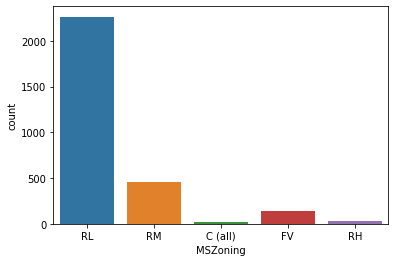

In [79]:
import seaborn as sns
sns.countplot(x_data[cols[2]])

In [80]:
x_data[cols[2]]=x_data[cols[2]].replace(np.NaN,'RL')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


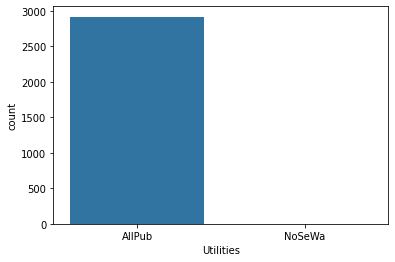

In [81]:
sns.countplot(x_data[cols[8]])

In [82]:
x_data[cols[8]]=x_data[cols[8]].replace(np.NaN,'AllPub')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


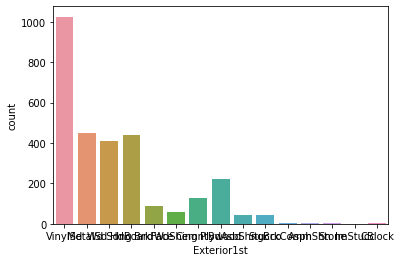

In [83]:
sns.countplot(x_data[cols[22]])

In [84]:
x_data[cols[22]]=x_data[cols[22]].replace(np.NaN,'VinylSd')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


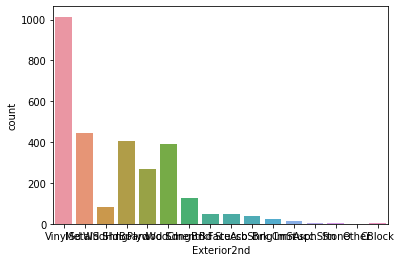

In [85]:
sns.countplot(x_data[cols[23]])

In [86]:
x_data[cols[23]]=x_data[cols[23]].replace(np.NaN,'VinylSd')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


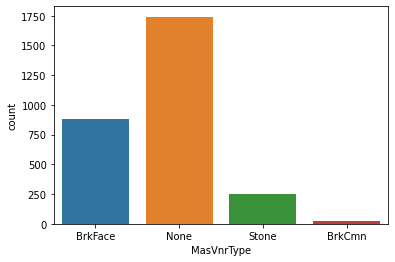

In [87]:
sns.countplot(x_data[cols[24]])

In [88]:
x_data[cols[24]]=x_data[cols[24]].replace(np.NaN,'None')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


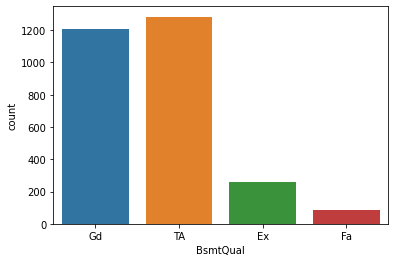

In [89]:
sns.countplot(x_data[cols[29]])

In [90]:
x_data[cols[29]]=x_data[cols[29]].replace(np.NaN,'TA')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


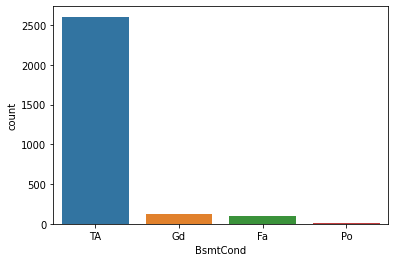

In [91]:
sns.countplot(x_data[cols[30]])

In [92]:
x_data[cols[30]]=x_data[cols[30]].replace(np.NaN,'TA')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


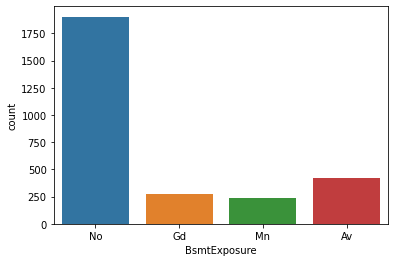

In [93]:
sns.countplot(x_data[cols[31]])

In [94]:
x_data[cols[31]]=x_data[cols[31]].replace(np.NaN,'No')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


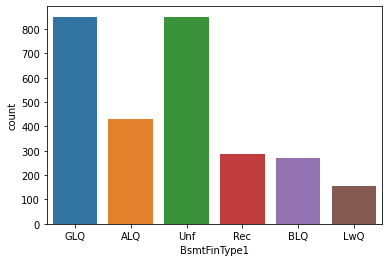

In [95]:
sns.countplot(x_data[cols[32]])

In [96]:
x_data[cols[32]]=x_data[cols[32]].replace(np.NaN,'GLQ')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


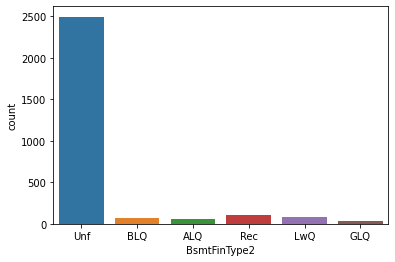

In [97]:
sns.countplot(x_data[cols[34]])

In [98]:
x_data[cols[34]]=x_data[cols[34]].replace(np.NaN,'Unf')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


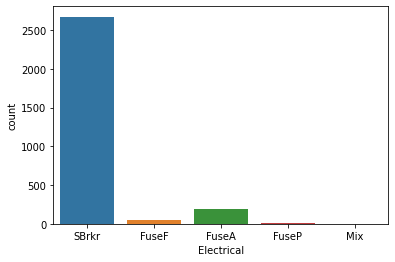

In [99]:
sns.countplot(x_data[cols[41]])

In [100]:
x_data[cols[41]]=x_data[cols[41]].replace(np.NaN,'SBrkr')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


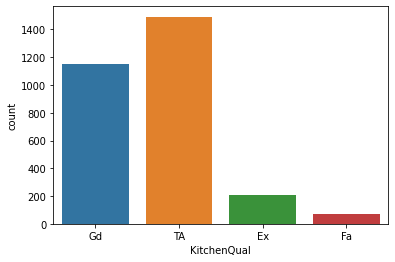

In [101]:
sns.countplot(x_data[cols[52]])

In [102]:
x_data[cols[52]]=x_data[cols[52]].replace(np.NaN,'TA')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


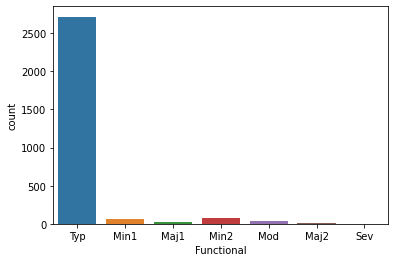

In [103]:
sns.countplot(x_data[cols[54]])

In [104]:
x_data[cols[54]]=x_data[cols[54]].replace(np.NaN,'Typ')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


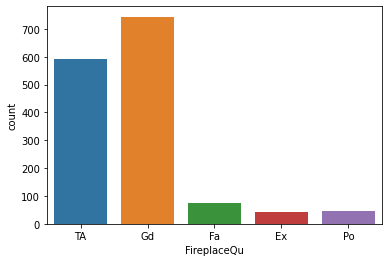

In [105]:
sns.countplot(x_data[cols[56]])

In [106]:
x_data[cols[56]]=x_data[cols[56]].replace(np.NaN,'New')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


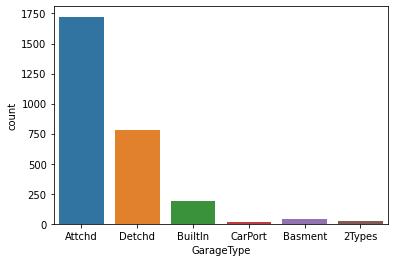

In [107]:
sns.countplot(x_data[cols[57]])

In [108]:
x_data[cols[57]]=x_data[cols[57]].replace(np.NaN,'Attchd')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


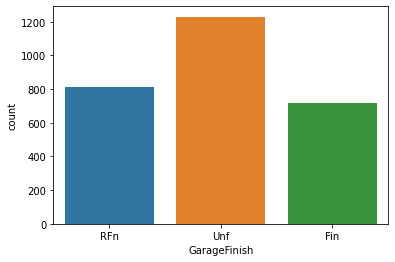

In [109]:
sns.countplot(x_data[cols[59]])

In [110]:
x_data[cols[59]]=x_data[cols[59]].replace(np.NaN,'unf')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


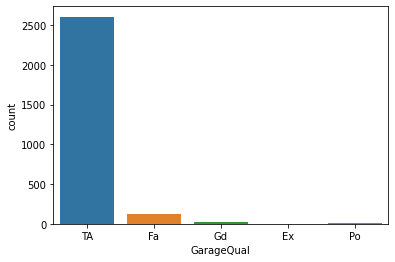

In [111]:
sns.countplot(x_data[cols[62]])

In [112]:
x_data[cols[62]]=x_data[cols[62]].replace(np.NaN,'TA')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


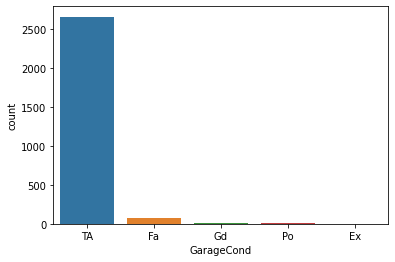

In [113]:
sns.countplot(x_data[cols[63]])

In [114]:
x_data[cols[63]]=x_data[cols[63]].replace(np.NaN,'TA')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


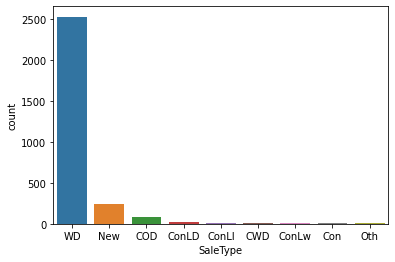

In [115]:
sns.countplot(x_data[cols[74]])

In [116]:
x_data[cols[74]]=x_data[cols[74]].replace(np.NaN,'WD')

In [118]:
a=x_data.isnull().sum()
for i in range(0,len(a)):
  if a[i]!=0:
    print(x_data[cols[i]].dtypes,i,a[i])

In [119]:
x_data.shape

(2919, 76)

In [120]:
x_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.016945,0.018249,-0.014451,-0.024922,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010385,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.025863,-0.010205,-0.008862,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,-0.072520,-0.125978,-0.219936,-0.248641,0.309309,0.026482,0.071677,0.009947,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.082790,-0.046596,-0.103392,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203603,0.041396,0.104971,0.331031,0.424147,0.023842,0.004669,0.349484,0.102940,-0.023020,0.164469,0.035572,0.212943,0.004359,0.320863,0.234612,0.070391,0.292086,0.338979,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,0.084055,0.021361,0.254125,0.332460,0.031515,0.000554,0.284519,0.127862,0.026192,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008564,0.180433,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,-0.042755,0.275072,0.549087,0.479152,0.245596,-0.048393,0.575126,0.164465,-0.040713,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.544247,0.600682,0.565065,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.002839,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135752,-0.050403,0.041489,-0.138162,-0.173952,-0.157418,0.005494,0.009048,-0.116569,-0.042109,0.084133,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.304784,-0.181783,-0.154145,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,-0.016581,0.034409,0.116905,0.024128,0.597554,-0.368477,1.000000,0.612235,0.312579,0.279547,-0.027591,0.130457,0.408466,0.310814,0.017588,-0.144191,0.242666,0.211549,-0.030278,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.790032,0.537839,0.480525,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,-0.050438,0.043315,0.085608,0.021612,0.571532,0.047654,0.612235,1.000000,0.196117,0.152056,-0.062125,0.165099,0.297969,0.242245,0.158985,-0.060371,0.316972,0.134878,-0.046261,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.627270,0.425985,0.376733,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,-0.025126,0.005422,0.202210,0.125354,0.430961,-0.135752,0.312579,0.196117,1.000000,0.301999,-0.015633,0.089712,0.395632,0.393761,0.120454,-0.057910,0.402032,0.141078,0.015001,0.258288,0.190753,0.077887,-0.051206,0.277535,0.274166,0.247714,0.360079,0.372865,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117,-0.018457
BsmtFinSF1,-0.016945,-0.064302,0.203603,0.194021,0.281704,-0.050403,0.279547,0.152056,0.301999,1.000000,-0.055045,-0.477404,0.536467,0.458056,-0.162284,-0.066028,0.211617,0.638744,0.078349,0.081510,-0.007311,-0.113526,-0.086354,0.052119,0.293046,0.189912,0.255436,0.310403,0.223471,0.124153,-0.099710,0.050908,0.096821,0.084462,0.093295,-0.000942,0.022556


In [121]:
new_data=pd.DataFrame({'Id':x_data['Id'],'MSSubClass':x_data['MSSubClass'],'LotFrontage':x_data['LotFrontage'],'LotArea':x_data['LotArea'],'OverallQual':x_data['OverallQual'],'OverallCond':x_data['OverallCond'],
                       'YearBuilt':x_data['YearBuilt'],'YearRemodAdd':x_data['YearRemodAdd'],'MasVnrArea':x_data['MasVnrArea'],'BsmtFinSF1':x_data['BsmtFinSF1'],'BsmtFinSF2':x_data['BsmtFinSF2'],
                       'BsmtUnfSF':x_data['BsmtUnfSF'],'TotalBsmtSF':x_data['TotalBsmtSF'],'1stFlrSF':x_data['1stFlrSF'],'2ndFlrSF':x_data['2ndFlrSF'],'LowQualFinSF':x_data['LowQualFinSF'],'GrLivArea':x_data['GrLivArea'],
                       'BsmtFullBath':x_data['BsmtFullBath'],'BsmtHalfBath':x_data['BsmtHalfBath'],'FullBath':x_data['FullBath'],'HalfBath':x_data['HalfBath'],'BedroomAbvGr':x_data['BedroomAbvGr'],
                       'KitchenAbvGr':x_data['KitchenAbvGr'],'TotRmsAbvGrd':x_data['TotRmsAbvGrd'],'Fireplaces':x_data['Fireplaces'],'GarageYrBlt':x_data['GarageYrBlt'],
                       'GarageCars':x_data['GarageCars'],'GarageArea':x_data['GarageArea'],'WoodDeckSF':x_data['WoodDeckSF'],'OpenPorchSF':x_data['OpenPorchSF'],
                       'EnclosedPorch':x_data['EnclosedPorch'],'3SsnPorch':x_data['3SsnPorch'],'ScreenPorch':x_data['ScreenPorch'],'PoolArea':x_data['PoolArea'],
                       'MoSold':x_data['MoSold'],'YrSold':x_data['YrSold']})

In [122]:
x_data=x_data.drop(columns=['GarageArea','1stFlrSF','TotRmsAbvGrd'])

In [123]:
cols=x_data.columns
for i in range(0,len(cols)):
  if(x_data[cols[i]].dtypes=='object'):
    a=pd.get_dummies(x_data[cols[i]],drop_first=True)
    new_data=pd.concat([new_data,a],axis=1)

In [124]:
new_data.shape

(2919, 238)

In [125]:
new_data=new_data.drop(columns=['Id'])

In [128]:
x_train=new_data[:1460]
x_test=new_data[1460:]

In [130]:
y_train=y_data[:1460]

In [131]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [132]:
sample_file=pd.read_csv('/content/sample_submission.csv')

In [133]:
sample_file.shape

(1459, 2)

In [134]:
submission=pd.DataFrame({'Id':sample_file['Id'],'SalePrice':y_pred})
submission.head()

,Id,SalePrice
0,1461,127151.08
1,1462,155165.00
2,1463,174257.33
3,1464,179771.00
4,1465,200567.91


In [135]:
filename = 'House Prediction Submmision.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: House Prediction Submmision.csv
